<a href="https://colab.research.google.com/github/DrakeData/Image_Classification/blob/main/Image_Classification_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 8: Image Classification

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import os
import glob
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.image import imread
from keras.preprocessing.image import ImageDataGenerator, load_img

## Ingest
Donwloading the data from Kaggle's API

In [2]:
! pip install kaggle

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp './drive/MyDrive/Colab Notebooks/API Keys/kaggle.json' ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle competitions download dogs-vs-cats-redux-kernels-edition

 97% 264M/271M [00:05<00:00, 98.9MB/s]
100% 271M/271M [00:05<00:00, 51.6MB/s]
  0% 0.00/111k [00:00<?, ?B/s]
100% 111k/111k [00:00<00:00, 76.2MB/s]
100% 543M/544M [00:10<00:00, 78.3MB/s]
100% 544M/544M [00:10<00:00, 52.2MB/s]


In [7]:
! unzip dogs-vs-cats-redux-kernels-edition.zip

unzip:  cannot find or open dogs-vs-cats-redux-kernels-edition.zip, dogs-vs-cats-redux-kernels-edition.zip.zip or dogs-vs-cats-redux-kernels-edition.zip.ZIP.


In [8]:
! unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

## EDA

### Image Sample
First, let's take a quick look at some of the images.

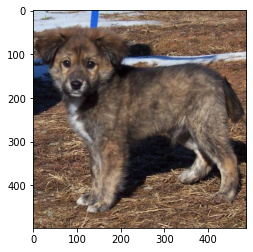

In [46]:
# Random image Check
filenames = os.listdir("./train")
sample = random.choice(filenames)
image = load_img("./train/"+sample)
plt.imshow(image);

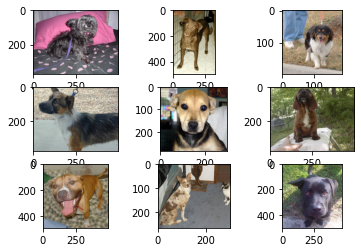

In [32]:
# Dog image comparison check

# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = os.path.join('train', 'dog.'+str(i)+'.jpg')
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

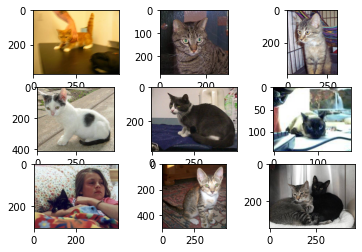

In [11]:
# Cat image comparison check

# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = os.path.join('train', 'cat.'+str(i)+'.jpg')
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

Looking at the sample images, we can see that the photos come in many different shapes and sizes. There are also pictures that have more than one animal in them or that the cat/dog is not directly in the middle of the picture. We will have to keep this in mind for when we build our classification model.

### Total Count Check
Look to see how many dog/cat images we have in the training set.

In [13]:
filenames = os.listdir("./train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [14]:
df.head()

,filename,category
0,dog.11062.jpg,1
1,dog.322.jpg,1
2,dog.8029.jpg,1
3,cat.4190.jpg,0
4,cat.5623.jpg,0


In [20]:
df['category'].value_counts()

1    12500
0    12500
Name: category, dtype: int64

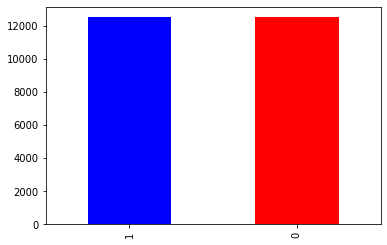

In [25]:
df['category'].value_counts().plot.bar(color=['blue', 'red']);

### Reshape photos

In [ ]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3